In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from cooltools.expected import logbin_expected, diagsum, combine_binned_expected
import cooler

### Hi-C in HAP1 with TetO integrations:
* T-MAU2 - TetR fused to MAU2, extruding on DNA
* T-MAU2_Dox_1H - TetR fused to MAU2, doxycycline treatment to stop loop extrusion
* T-mCherry - TetR fused to mCherry

## Genome-wide scaling

In [2]:
def get_scaling_and_derivative(experiment):
    c = cooler.Cooler('./coolers/' + experiment + '.hg38.mapq_30.1000.mcool::resolutions/5000')
    exp = pd.read_csv('./expected/' + experiment + '_oe_cis_5K.tsv', sep = '\t')
    resolution = c.info["bin-size"]
    binned_exp, binned_slope, bins = logbin_expected(exp)
    scaling, derivative = combine_binned_expected(binned_exp, binned_slope, spread_funcs = 'logstd')
    return(scaling, derivative, resolution)

In [3]:
scaling_mau2, derivative_mau2, resolution_mau2 = get_scaling_and_derivative('T-MAU2')
scaling_dox, derivative_dox, resolution_dox = get_scaling_and_derivative('T-MAU2_Dox_1H')
scaling_mcherry, derivative_mcherry, resolution_mcherry = get_scaling_and_derivative('T-mCherry')

scaling_haarhuis_WT, derivative_haarhuis_WT, resolution_haarhuis_WT = get_scaling_and_derivative('haarhuis_2017.WT')
scaling_sanborn_WT, derivative_sanborn_WT, resolution_sanborn_WT = get_scaling_and_derivative('sanborn_2015.WT')

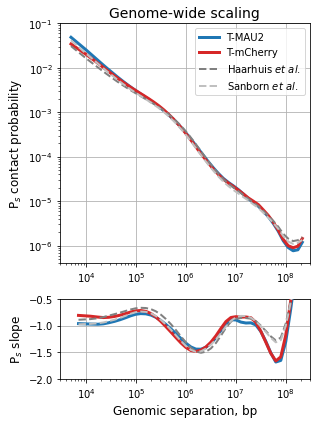

In [5]:
plt.figure(figsize = (4.5, 6))
spec = gridspec.GridSpec(ncols = 1, nrows = 2, height_ratios = [3, 1])

plt.subplot(spec[0])
plt.title('Genome-wide scaling', fontsize = 14)
plt.plot(scaling_mau2['diag.avg'] * resolution_mau2, scaling_mau2['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-MAU2', color = 'C0')
plt.plot(scaling_mcherry['diag.avg'] * resolution_mcherry, scaling_mcherry['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-mCherry', color = 'C3')
plt.plot(scaling_haarhuis_WT['diag.avg'] * resolution_haarhuis_WT, scaling_haarhuis_WT['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Haarhuis $et$ $al$.', color = 'grey')
plt.plot(scaling_sanborn_WT['diag.avg'] * resolution_sanborn_WT, scaling_sanborn_WT['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Sanborn $et$ $al$.', color = 'silver')
plt.ylabel('P$_s$ contact probability', fontsize = 12)
plt.xscale('log')
plt.yscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 300000000))
plt.ylim((4e-7, 1e-1))
plt.legend(loc = 'upper right', fontsize = 10)

plt.subplot(spec[1])
plt.plot(derivative_mau2['diag.avg'] * resolution_mau2, derivative_mau2['slope'], lw = 3, zorder = 3, color = 'C0')
plt.plot(derivative_mcherry['diag.avg'] * resolution_mcherry, derivative_mcherry['slope'], lw = 3, zorder = 3, color = 'C3')
plt.plot(derivative_haarhuis_WT['diag.avg'] * resolution_haarhuis_WT, derivative_haarhuis_WT['slope'], ls = '--', lw = 2, zorder = 3, color = 'grey')
plt.plot(derivative_sanborn_WT['diag.avg'] * resolution_sanborn_WT, derivative_sanborn_WT['slope'], ls = '--', lw = 2, zorder = 3, color = 'silver')
plt.ylabel('P$_s$ slope', fontsize = 12)
plt.xlabel('Genomic separation, bp', fontsize = 12)
plt.xscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 300000000))
plt.ylim((-2, -0.5))

plt.tight_layout()
plt.savefig('/DATA/users/magnitov/tacl/paper_figures_new/scalings_genome_wide_1.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

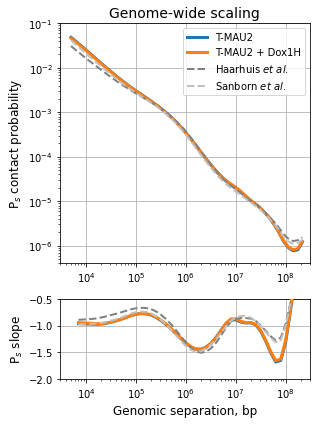

In [6]:
plt.figure(figsize = (4.5, 6))
spec = gridspec.GridSpec(ncols = 1, nrows = 2, height_ratios = [3, 1])

plt.subplot(spec[0])
plt.title('Genome-wide scaling', fontsize = 14)
plt.plot(scaling_mau2['diag.avg'] * resolution_mau2, scaling_mau2['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-MAU2', color = 'C0')
plt.plot(scaling_dox['diag.avg'] * resolution_dox, scaling_dox['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-MAU2 + Dox1H', color = 'C1')
plt.plot(scaling_haarhuis_WT['diag.avg'] * resolution_haarhuis_WT, scaling_haarhuis_WT['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Haarhuis $et$ $al$.', color = 'grey')
plt.plot(scaling_sanborn_WT['diag.avg'] * resolution_sanborn_WT, scaling_sanborn_WT['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Sanborn $et$ $al$.', color = 'silver')
plt.ylabel('P$_s$ contact probability', fontsize = 12)
plt.xscale('log')
plt.yscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 300000000))
plt.ylim((4e-7, 1e-1))
plt.legend(loc = 'upper right', fontsize = 10)

plt.subplot(spec[1])
plt.plot(derivative_mau2['diag.avg'] * resolution_mau2, derivative_mau2['slope'], lw = 3, zorder = 3, color = 'C0')
plt.plot(derivative_dox['diag.avg'] * resolution_dox, derivative_dox['slope'], lw = 3, zorder = 3, color = 'C1')
plt.plot(derivative_haarhuis_WT['diag.avg'] * resolution_haarhuis_WT, derivative_haarhuis_WT['slope'], ls = '--', lw = 2, zorder = 3, color = 'grey')
plt.plot(derivative_sanborn_WT['diag.avg'] * resolution_sanborn_WT, derivative_sanborn_WT['slope'], ls = '--', lw = 2, zorder = 3, color = 'silver')
plt.ylabel('P$_s$ slope', fontsize = 12)
plt.xlabel('Genomic separation, bp', fontsize = 12)
plt.xscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 300000000))
plt.ylim((-2, -0.5))

plt.tight_layout()
plt.savefig('/DATA/users/magnitov/tacl/paper_figures_new/scalings_genome_wide_2.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

## Local scaling around integrations

In [7]:
def get_scaling_and_derivative_local(experiment, window):
    c = cooler.Cooler('./coolers/' + experiment + '.hg38.mapq_30.1000.mcool::resolutions/5000')
    exp = pd.read_csv('./expected/' + experiment + '_tetO_' + str(window) + 'Mb_oe_cis_5K.tsv', sep = '\t')
    resolution = c.info["bin-size"]
    binned_exp, binned_slope, bins = logbin_expected(exp)
    scaling, derivative = combine_binned_expected(binned_exp, binned_slope, spread_funcs = 'logstd')
    return(scaling, derivative, resolution)

In [8]:
scaling_mau2_local, derivative_mau2_local, resolution_mau2_local = get_scaling_and_derivative_local('T-MAU2', 1)
scaling_dox_local, derivative_dox_local, resolution_dox_local = get_scaling_and_derivative_local('T-MAU2_Dox_1H', 1)
scaling_mcherry_local, derivative_mcherry_local, resolution_mcherry_local = get_scaling_and_derivative_local('T-mCherry', 1)

scaling_haarhuis_WT_local, derivative_haarhuis_WT_local, resolution_haarhuis_WT_local = get_scaling_and_derivative_local('haarhuis_2017.WT', 1)
scaling_sanborn_WT_local, derivative_sanborn_WT_local, resolution_sanborn_WT_local = get_scaling_and_derivative_local('sanborn_2015.WT', 1)

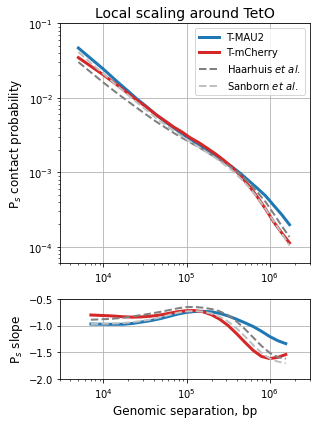

In [9]:
plt.figure(figsize = (4.5, 6))
spec = gridspec.GridSpec(ncols = 1, nrows = 2, height_ratios = [3, 1])

plt.subplot(spec[0])
plt.title('Local scaling around TetO', fontsize = 14)
plt.plot(scaling_mau2_local['diag.avg'] * resolution_mau2_local, scaling_mau2_local['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-MAU2', color = 'C0')
plt.plot(scaling_mcherry_local['diag.avg'] * resolution_mcherry_local, scaling_mcherry_local['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-mCherry', color = 'C3')
plt.plot(scaling_haarhuis_WT_local['diag.avg'] * resolution_haarhuis_WT_local, scaling_haarhuis_WT_local['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Haarhuis $et$ $al$.', color = 'grey')
plt.plot(scaling_sanborn_WT_local['diag.avg'] * resolution_sanborn_WT_local, scaling_sanborn_WT_local['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Sanborn $et$ $al$.', color = 'silver')
plt.ylabel('P$_s$ contact probability', fontsize = 12)
plt.xscale('log')
plt.yscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 3000000))
plt.ylim((6e-5, 1e-1))
plt.legend(loc = 'upper right', fontsize = 10)

plt.subplot(spec[1])
plt.plot(derivative_mau2_local['diag.avg'] * resolution_mau2_local, derivative_mau2_local['slope'], lw = 3, zorder = 3, color = 'C0')
plt.plot(derivative_mcherry_local['diag.avg'] * resolution_mcherry_local, derivative_mcherry_local['slope'], lw = 3, zorder = 3, color = 'C3')
plt.plot(derivative_haarhuis_WT_local['diag.avg'] * resolution_haarhuis_WT_local, derivative_haarhuis_WT_local['slope'], ls = '--', lw = 2, zorder = 3, color = 'grey')
plt.plot(derivative_sanborn_WT_local['diag.avg'] * resolution_sanborn_WT_local, derivative_sanborn_WT_local['slope'], ls = '--', lw = 2, zorder = 3, color = 'silver')
plt.ylabel('P$_s$ slope', fontsize = 12)
plt.xlabel('Genomic separation, bp', fontsize = 12)
plt.xscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 3000000))
plt.ylim((-2, -0.5))

plt.tight_layout()
plt.savefig('/DATA/users/magnitov/tacl/paper_figures_new/scalings_local_1.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

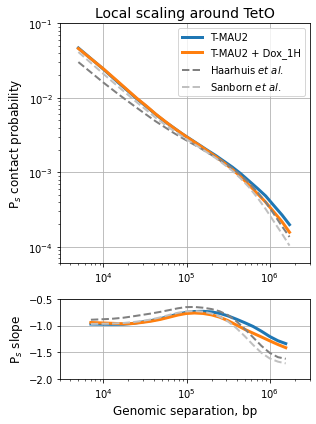

In [10]:
plt.figure(figsize = (4.5, 6))
spec = gridspec.GridSpec(ncols = 1, nrows = 2, height_ratios = [3, 1])

plt.subplot(spec[0])
plt.title('Local scaling around TetO', fontsize = 14)
plt.plot(scaling_mau2_local['diag.avg'] * resolution_mau2_local, scaling_mau2_local['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-MAU2', color = 'C0')
plt.plot(scaling_dox_local['diag.avg'] * resolution_dox_local, scaling_dox_local['balanced.avg'], 
         lw = 3, zorder = 3, label = 'T-MAU2 + Dox_1H', color = 'C1')
plt.plot(scaling_haarhuis_WT_local['diag.avg'] * resolution_haarhuis_WT_local, scaling_haarhuis_WT_local['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Haarhuis $et$ $al$.', color = 'grey')
plt.plot(scaling_sanborn_WT_local['diag.avg'] * resolution_sanborn_WT_local, scaling_sanborn_WT_local['balanced.avg'], 
         ls = '--', lw = 2, zorder = 3, label = 'Sanborn $et$ $al$.', color = 'silver')
plt.ylabel('P$_s$ contact probability', fontsize = 12)
plt.xscale('log')
plt.yscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 3000000))
plt.ylim((6e-5, 1e-1))
plt.legend(loc = 'upper right', fontsize = 10)

plt.subplot(spec[1])
plt.plot(derivative_mau2_local['diag.avg'] * resolution_mau2_local, derivative_mau2_local['slope'], lw = 3, zorder = 3, color = 'C0')
plt.plot(derivative_dox_local['diag.avg'] * resolution_dox_local, derivative_dox_local['slope'], lw = 3, zorder = 3, color = 'C1')
plt.plot(derivative_haarhuis_WT_local['diag.avg'] * resolution_haarhuis_WT_local, derivative_haarhuis_WT_local['slope'], ls = '--', lw = 2, zorder = 3, color = 'grey')
plt.plot(derivative_sanborn_WT_local['diag.avg'] * resolution_sanborn_WT_local, derivative_sanborn_WT_local['slope'], ls = '--', lw = 2, zorder = 3, color = 'silver')
plt.ylabel('P$_s$ slope', fontsize = 12)
plt.xlabel('Genomic separation, bp', fontsize = 12)
plt.xscale('log')
plt.grid(zorder = 0)
plt.xlim((3000, 3000000))
plt.ylim((-2, -0.5))

plt.tight_layout()
plt.savefig('/DATA/users/magnitov/tacl/paper_figures_new/scalings_local_2.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()